# Automated Trading Using Python

1. Extracts financial data using Quandl API
2. Numpy for calculating daily returns, Pandas for backtesting, Matplotlib for plotting graph
3. Strategy of Simple Moving Averages (SMA) over 30 days and 100 days
4. Finally indicates when to Buy/Sell the Stock/Asset using Dual Moving Average Crossover (DMAC)
5. Tested on Microsoft Corp., Apple Inc., etc 

In [1]:
import pandas as pd
import quandl as qd

qd.ApiConfig.api_key = "V1kSTQjxzFxEw-98aPWK"

msft_data = qd.get("EOD/MSFT",
				start_date="2010-04-04",
				end_date="2020-04-04")
msft_data.head()

,Open,High,Low,Close,Volume,Dividend,Split,Adj_Open,Adj_High,Adj_Low,Adj_Close,Adj_Volume
Date,,,,,,,,,,,,
2013-09-03,31.7500,32.07,31.29,31.880,154507000.0,0.0,1.0,27.219518,27.493856,26.825156,27.330968,154507000.0
2013-09-04,31.3900,31.47,31.11,31.195,142320600.0,0.0,1.0,26.910887,26.979472,26.670841,26.743712,142320600.0
2013-09-05,31.1000,31.44,30.95,31.235,71644900.0,0.0,1.0,26.662268,26.953752,26.533672,26.778004,71644900.0
2013-09-06,31.3100,31.39,31.13,31.152,75434900.0,0.0,1.0,26.842302,26.910887,26.687987,26.706848,75434900.0
2013-09-09,31.2208,31.79,31.20,31.655,49628500.0,0.0,1.0,26.765831,27.253810,26.747999,27.138074,49628500.0


In [2]:
# Import numpy package
import numpy as np


# assign `Adj Close` to `close_price`
close_price = msft_data[['Adj_Close']]

# returns as fractional change
daily_return = close_price.pct_change()

# replacing NA values with 0
daily_return.fillna(0, inplace=True)

print(daily_return)

            Adj_Close
Date                 
2013-09-03   0.000000
2013-09-04  -0.021487
2013-09-05   0.001282
2013-09-06  -0.002657
2013-09-09   0.016147
...               ...
2017-12-21  -0.000234
2017-12-22   0.000117
2017-12-26  -0.001286
2017-12-27   0.003630
2017-12-28   0.000117

[1090 rows x 1 columns]


In [3]:
# assigning adjusted closing prices
# to adj_prices
adj_price = msft_data['Adj_Close']

# calculate the moving average
mav1 = adj_price.rolling(window=30).mean()
mav2 = adj_price.rolling(window=100).mean()

# print the result
print(mav1[-10:])
print(mav2[-10:])

Date
2017-12-14    80.037881
2017-12-15    80.140734
2017-12-18    80.225732
2017-12-19    80.282702
2017-12-20    80.336131
2017-12-21    80.379714
2017-12-22    80.438538
2017-12-26    80.500837
2017-12-27    80.571123
2017-12-28    80.637918
Name: Adj_Close, dtype: float64
Date
2017-12-14    73.987831
2017-12-15    74.117670
2017-12-18    74.251441
2017-12-19    74.381084
2017-12-20    74.510981
2017-12-21    74.641824
2017-12-22    74.775794
2017-12-26    74.909753
2017-12-27    75.041658
2017-12-28    75.176312
Name: Adj_Close, dtype: float64


In [4]:
#dataframe to store the data
data = pd.DataFrame()
data['adj_price'] = adj_price
data['mav1'] = mav1
data['mav2'] = mav2

#function to indicate when to buy and sell the stock/asset
def buy_sell(data):
    sigPriceBuy = []
    sigPriceSell = []
    flag = -1
    
    for i in range(len(data)):
        if data['mav1'][i] > data['mav2'][i]:
            if flag !=1:
                sigPriceBuy.append(data['adj_price'][i])
                sigPriceSell.append(np.nan)
                flag = 1
            else:
                sigPriceBuy.append(np.nan)
                sigPriceSell.append(np.nan)
        elif data['mav1'][i] < data['mav2'][i]:
            if flag != 0:
                sigPriceBuy.append(np.nan)
                sigPriceSell.append(data['adj_price'][i])
                flag = 0
            else:
                sigPriceBuy.append(np.nan)
                sigPriceSell.append(np.nan)
        else:
                sigPriceBuy.append(np.nan)
                sigPriceSell.append(np.nan)
    return (sigPriceBuy, sigPriceSell)

#store the buy and sell data into a variable
buy_sell = buy_sell(data)
data['Buy_Signal_Price'] = buy_sell[0]
data['Sell_Signal_Price'] = buy_sell[1]

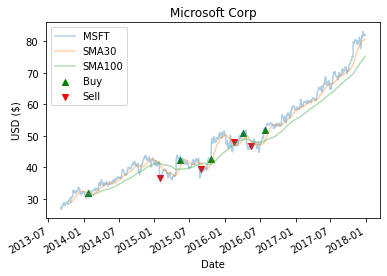

In [5]:
# import the matplotlib package
# to see the plot
import matplotlib.pyplot as plt

adj_price.plot(label = 'MSFT', alpha = 0.35)
plt.title("Microsoft Corp", loc = 'center')
plt.ylabel('USD ($)')
mav1.plot(label = 'SMA30', alpha = 0.35)
mav2.plot(label = 'SMA100', alpha = 0.35)
plt.scatter(data.index, data['Buy_Signal_Price'], label = 'Buy', marker = '^', color = 'green')
plt.scatter(data.index, data['Sell_Signal_Price'], label = 'Sell', marker = 'v', color = 'red')
plt.legend()